## In-class exercises Class 19


---
Today, we will work some more with fits to a Gaussian...





First, let's import the tools that we will need:

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import math


## Gaussian fits with parameter errors.   

Lets make some random normal Gaussian data.  

In [2]:
data = np.random.normal(0, 1, 10000)  #Draw some random data from the normal distribution

Let's plot it:

Text(0.5, 0, 'Sigma')

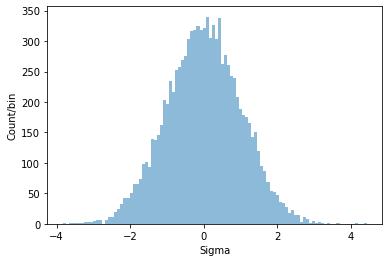

In [3]:
bin_values, bins, myart = plt.hist(data, 100, alpha=0.5)  #Fill a histogram and draw it
plt.ylabel("Count/bin")
plt.xlabel("Sigma")

I want to fit this.  Last time we used "scipy.stats.norm.fit".  

In [4]:
mu, sigma = scipy.stats.norm.fit(data)  #fit data to extract parameters

print(f"\n\n The best fit parameters are:  mu={mu:4.4f}  sigma={sigma:4.4f} \n\n")




 The best fit parameters are:  mu=0.0048  sigma=1.0095 




That is so easy, and it works.  Unfortunatly, with that function, we can get the parameters, but we have no access to the uncertainly on the parameters. BOO!  What good is a 'measurement' of a parameter with no uncertainty?  Worthless!  So, we need to define our own.  There are many ways to do it.  Here is one with a lambda function using norm.pdf.

In [5]:
gaus_func1=lambda x, mu, sig : scipy.norm.pdf(x, loc=mu, scale=sig)

In [6]:
gaus_func=lambda x, mu, sig, a : a*norm.pdf(x, loc=mu, scale=sig)

## **EXERCISE 1**:  
<span style="color:red">  It is also possible to implement the Gaussian function without using norm.pdf.  Just make a regular function that contains the Gaussian fuction.  Set the parameters to mu=0, sigma=1 and plot/draw the function.   Recall:</red>
    
![Image](img/Gaus.png) 
    
    
    
    HINT:  See the ax.plot command below to recall how to plot a function.  

In [7]:
# Put your code here.  
#def my_gauss(x,mu,sigma,A)
    #Put your function code here
    #
    #return result

Our lambda function takes 4 inputs.  We can treat x as a variable and the other 3 as parameters to fit for.

In [8]:



#We want to use the bin centers for the x values
#Need to ignore the underflow and overlow bins
centers = (0.5*(bins[1:]+bins[:-1]))


#print(len(centers),len(bin_values))  #Just for trouble shooting

#For our initial parameters, let's guess:
#mean=0
#sigma=1
#A=300
pars, cov = scipy.optimize.curve_fit(gaus_func, centers, bin_values, p0=[0,1,300])




print(f"\n\n The best fit parameters are: mu={pars[0]:4.2f}  sigma={pars[1]:4.2} a={pars[2]:4.2f}\n\n")



 The best fit parameters are: mu=0.01  sigma= 1.0 a=829.85




## **EXERCISE 2**:  
<span style="color:red">  Make the fit with your Gaussian function that you defined in example 1 above.  Do the fit values agree with mine?   </red>
    
    

In [9]:
#Put your code here

Our fit worked above, and our fit values seem reasonable!  Let's plot it, and see how it looks...  

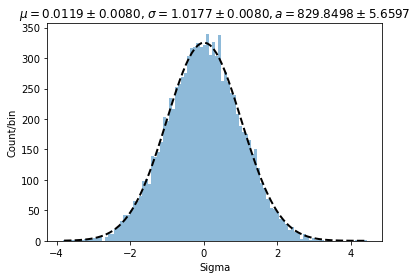

In [10]:
#Use subplots so we have access to fig and ax
fig, ax = plt.subplots()

#Draw our Gaussian data
ax.hist(data, 100, alpha=0.5) 

#Draw our Gaussian best-fit function
ax.plot(centers, gaus_func(centers,*pars), 'k--',linewidth = 2, label='fit before') 

#Set the title with parameter data
ax.set_title(f'$\mu={pars[0]:.4f}\pm{np.sqrt(cov[0,0]):.4f}$, $\sigma={pars[1]:.4f}\pm{np.sqrt(cov[1,1]):.4f},a={pars[2]:.4f}\pm{np.sqrt(cov[2,2]):.4f}$')
plt.ylabel("Count/bin")
plt.xlabel("Sigma")            
plt.show()


That looks like a reasonable fit. One way to visualize the quality of your fit is to plot the residuals.  That is, we want to look at (data-fit)/sigma for each point used in the fit.  So, we are just looking at how far off the model is for each data point in units of sigma.  Let's do it...



100
100 98


(-3.0, 3.0)

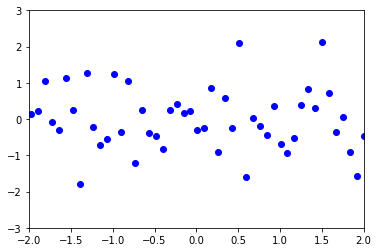

In [11]:
f_res=[]

print(len(bin_values))

for i in range(len(bin_values[1:-1])):
    res=0
    if (bin_values[i]>=1):  #Avoid divide by zero...
        res = (bin_values[i]-gaus_func(centers[i],*pars))/math.sqrt(bin_values[i])

    f_res.append(res)
    #print(res,"\n")  #for troubleshooting

print(len(centers),len(f_res))  #for troubleshooting
#x_res = np.linspace(-5, 5, num=98)

#I really should add error bars!!!!
plt.scatter(centers[1:-1], f_res, label='Data',color='blue')
plt.xlim(xmax = 2, xmin = -2) #Gaussian approximation is valid...  
plt.ylim(ymax = 3, ymin = -3)

Doesn't look perfect, let's look at the pull distribution.  

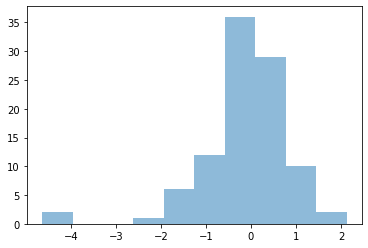

In [12]:
bin_values, bins, myart = plt.hist(f_res, 10, alpha=0.5)


That looks kind of like a normal Gaussian. Let's fit it with our fancy Gaussian function, and check the parameters:

In [13]:
mu, sigma = scipy.stats.norm.fit(f_res)  #fit data to extract parameters

#Need to ignore the underflow and overlow bins
centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = scipy.optimize.curve_fit(gaus_func, centers, bin_values, p0=[0,1,20])
print(f"\n\n The best fit parameters are: mu={pars[0]:4.4f} +-{np.sqrt(cov[0,0]):.4f}  sigma={pars[1]:4.4}+-{np.sqrt(cov[1,1]):.4f} a={pars[2]:4.2f}\n\n")



 The best fit parameters are: mu=0.0020 +-0.0397  sigma=0.6697+-0.0399 a=62.01




Awesome!  This is perfectly consistent with a Gaussian of mean=0 and sigma=1.

For completeness, I'll draw the fit.

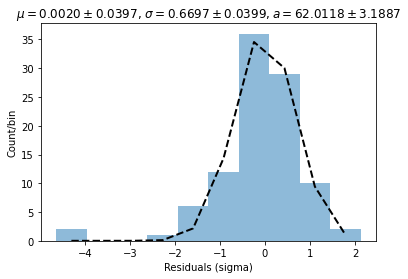

In [14]:
#Use subplots so we have access to fig and ax
fig, ax = plt.subplots()

#Draw our Pull Distribution
plt.hist(f_res, 10, alpha=0.5)

#Draw our Gaussian best-fit function
ax.plot(centers, gaus_func(centers,*pars), 'k--',linewidth = 2, label='fit before') 

#Set the title with parameter data
ax.set_title(f'$\mu={pars[0]:.4f}\pm{np.sqrt(cov[0,0]):.4f}$, $\sigma={pars[1]:.4f}\pm{np.sqrt(cov[1,1]):.4f},a={pars[2]:.4f}\pm{np.sqrt(cov[2,2]):.4f}$')
plt.xlabel("Residuals (sigma)")
plt.ylabel("Count/bin")     
    
plt.show()

Again, this pull distribution looks great (considering the limited statistics we have)!  

## **EXERCISE 3**:  
<span style="color:red">  Explain in your own words how to make the residual plot?  Why is it more useful than the the Chi^2 value?  Explain what the pull distrubution is in your own words.  </red>
    
    

If you finish early look at the HW due this week, and see if you have questions.  